# <font color=#f06969>Evaluation of Synthetic Data</font>

## PRISM dataset evaluation from synthetic data generated on 28/09/2020
<hr>

The following jupyter notebook evaluates the distribution, fidelity and usefulness of the synthetic data synthesised for the PRISM dataset.<br>
The evaluation methods included are:
#### 1. Distribution evaluation methods:
[1.1 Numerical variables distribution comparison](#hist_link)
<br>[1.2 Categorical variables distribution comparison](#cat_link)
<br>[1.3 Pearson's Correlation Coefficient comparison](#pearsons_link)

#### 2. Fidelity evaluation methods:
[2.1 tSNE and PCA plots comparison](#tSNE_PCA_link)
<br>[2.2 Discriminative model performance](#discrim_link)
<br>[2.3 Autocorrelation comparison](#auto_link)

#### 3. Usefulness evaluation methods:
[3.1 Predictive model performance comparison](#pred_link)
<br>[3.2 Next-step predictive model performance comparison](#tpred_link)

<hr>

# <font color=#0275D8>Importing Packages</font>

In [18]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from evaluation.helper_eval import *
from evaluation.distributions_eval import *
from evaluation.fidelity_eval import *
from evaluation.predictive_eval import *

<hr>

# <font color=#0275D8>Data Loading and Preparation </font>

In [19]:
# specify numerical columns
num_cols = ['ab_pain_dur', 'age', 'aneroxia_dur', 'plasmodium_density',
               'cough_dur', 'diarrhea_dur', 'fatigue_dur', 'fever_dur', 'headache_dur',
               'height', 'hemoglobin', 'joint_pain_dur', 'muscle_ache_dur', 'temp',
               'vomit_dur', 'weight', 'dday']

# specify categorical columns
cat_cols = ['complicated_malaria_no',
    'complicated_malaria_not_assessed', 'complicated_malaria_yes',
    'febrile_no', 'febrile_yes', 'ITN_no', 'ITN_not_applicable', 'ITN_yes',
    'malaria_no', 'malaria_yes',
    'malaria_parasite_blood_smear_indicated_but_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_negative',
    'malaria_parasite_blood_smear_negative_/_lamp_not_done',
    'malaria_parasite_blood_smear_negative_/_lamp_positive',
    'malaria_parasite_blood_smear_not_indicated',
    'malaria_parasite_blood_smear_positive_/_no_malaria',
    'malaria_parasite_symptomatic_malaria',
    'malaria_treatment_artmether-lumefantrine_for_uncomplicated_malaria',
    'malaria_treatment_no_malaria_medications_given',
    'malaria_treatment_quinine_for_uncomplicated_malaria_in_the_1st_trimester_of_pregnancy',
    'malaria_treatment_quinine_for_uncomplicated_malaria_within_14_days_of_a_previous_treatment_for_malaria',
    'malaria_treatment_quinine_or_artesunate_for_complicated_malaria',
    'plasmodium_gametocytes_no', 'plasmodium_gametocytes_yes',
    'plasmodium_lamp_negative', 'plasmodium_lamp_no_result',
    'plasmodium_lamp_positive', 'visit_type_enrollment',
    'visit_type_scheduled_visit', 'visit_type_unscheduled_visit']

In [20]:
# load in original and generated (intermediate) csv
ori = pd.read_csv('data/ori_prism_cleaned.csv')
gen = pd.read_csv('data/gen_prism_int_c1000_cumsum.csv')

#scale data
scaler = MinMaxScaler()
scaler.fit(ori)
ori_scaled = pd.DataFrame(scaler.transform(ori), index=ori.index, columns=ori.columns)
gen_scaled = pd.DataFrame(scaler.transform(gen), index=gen.index, columns=gen.columns)

# get numerical and categorical columns for original and generated data
# don't need to scale for one-hot encoded values (as there already between 0 and 1)
ori_num = get_numerical_columns_df(ori, num_cols)
gen_num = get_numerical_columns_df(gen, num_cols)
ori_scaled_num = get_numerical_columns_df(ori_scaled, num_cols)
gen_scaled_num = get_numerical_columns_df(gen_scaled, num_cols)
ori_cat = get_categorical_columns_df(ori, cat_cols)
gen_cat = get_categorical_columns_df(gen, cat_cols)

# turn dataframe into 3D np arrays (both cat and num data)
ori_3d = Stack2DSequence(ori) #shape (1347,130,48)
gen_3d = Stack2DSequence(gen) #shape (1347,130,48)
ori_scaled_3d = Stack2DSequence(ori_scaled) 
gen_scaled_3d = Stack2DSequence(gen_scaled)

# turn dataframe into 3D np arrays of only numerical or categorical data
ori_3d_num = Stack2DSequence(get_numerical_columns_df(ori, num_cols, return_id=True))
gen_3d_num = Stack2DSequence(get_numerical_columns_df(gen, num_cols, return_id=True))
ori_3d_scaled_num = Stack2DSequence(get_numerical_columns_df(ori_scaled, num_cols, return_id=True))
gen_3d_scaled_num = Stack2DSequence(get_numerical_columns_df(gen_scaled, num_cols, return_id=True))
ori_3d_cat = Stack2DSequence(get_categorical_columns_df(ori, cat_cols, return_id=True))
gen_3d_cat = Stack2DSequence(get_categorical_columns_df(gen, cat_cols, return_id=True))

# load in original original and generated csv already with date time and same column names as original original
ori_auto = pd.read_csv("../../isaFull.tsv", '\t')
gen_auto = pd.read_csv('data/gen_prism_final_c1000_cumsum.csv')
#remove <5 visits from original original data to match the generated data.
ori_auto_5above = ori_auto[ori_auto.groupby('Participant_Id')['Participant_Id'].transform('size') >= 5].reset_index(drop=True)

In [21]:
# create a dictionary for the case where we want to loop through multiple sets of real and gen data
synthetic_data_dic = {'DoppelGANger_0928_cumsum':[ori, gen]}
synthetic_data_scaled_dic = {'DoppelGANger_0928_cumsum':[ori_scaled, gen_scaled]}
synthetic_num_dic = {'DoppelGANger_0928_cumsum':[ori_num, gen_num]}
synthetic_num_scaled_dic = {'DoppelGANger_0928_cumsum':[ori_scaled_num, gen_scaled_num]}
synthetic_cat_dic = {'DoppelGANger_0928_cumsum':[ori_cat, gen_cat]}
synthetic_array_dic = {'DoppelGANger_0928_cumsum':[ori_3d, gen_3d]}
synthetic_array_scaled_dic = {'DoppelGANger_0928_cumsum':[ori_scaled_3d, gen_scaled_3d]}
synthetic_array_num_dic = {'DoppelGANger_0928_cumsum':[ori_3d_num, gen_3d_num]}
synthetic_array_num_scaled_dic = {'DoppelGANger_0928_cumsum':[ori_3d_scaled_num, gen_3d_scaled_num]}
synthetic_array_cat_dic = {'DoppelGANger_0928_cumsum':[ori_3d_cat, gen_3d_cat]}
synthetic_auto_dic = {'DoppelGANger_0928_cumsum': [ori_auto_5above, gen_auto]}
syn_keys = list(synthetic_data_dic.keys())
n = len(syn_keys)

<hr>

# <font color=#0275D8> 1. Distribution evaluation</font>

<a id = "hist_link" Here ></a>

## <font color=#472F91> 1.1 Numerical variables distribution comparison </font>

### <u> Method description </u>

For numerical columns, histograms for the original dataset and the generated dataset are overlaid for each column, giving a visual perception of the similarity in diversity and distribution.
To quantify this, a Kolmogrov-Smirnov Test is performed with 100 randomly selected samples to avoid biasing the result towards rejecting the null hypothesis. The Kolmogrov-Smirnov Test is a non parametric hypothesis test where the null hypothesis is that two samples (one from the original and one from the synthetic) originate from the same distribution.
<br><b>The closer the Kolmogrov-Smirnov Test p-value is to 1, the higher the fidelity</b>

### <u> Results </u>

Overlays of original and generated histograms (probability density function) and corresponding cumulative distribution function for each column of the dataset.

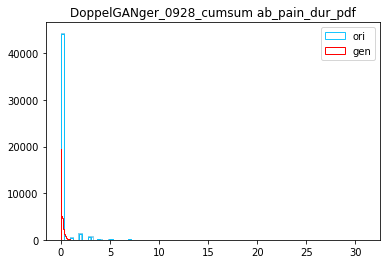

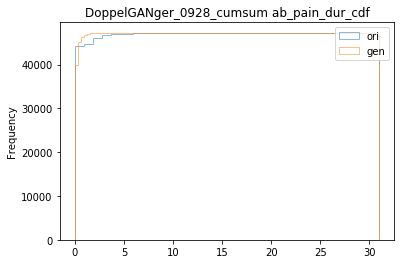

K-S test result: [6.35000000e-01 1.00550635e-12]


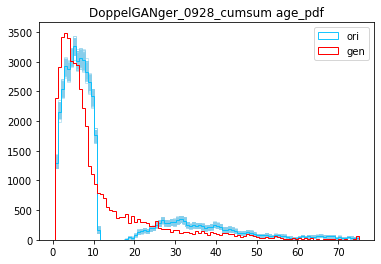

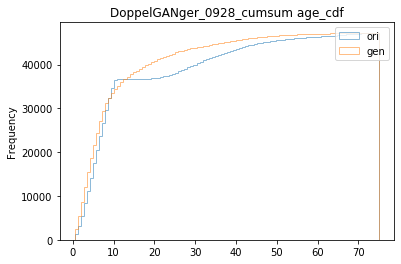

K-S test result: [0.177     0.1671307]


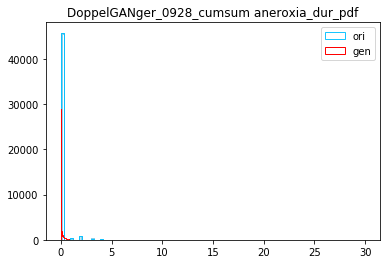

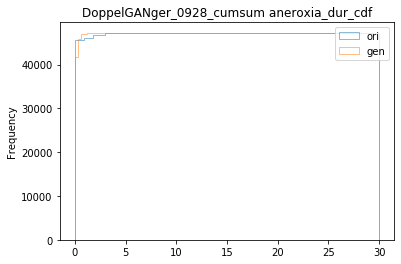

K-S test result: [0.412      0.00061399]


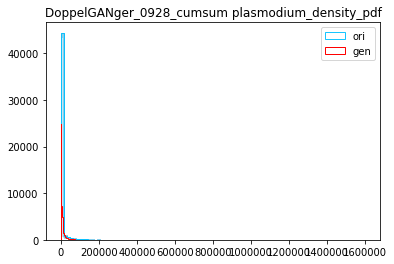

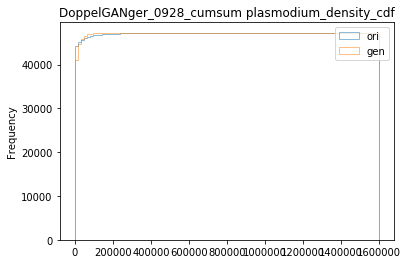

K-S test result: [5.13000000e-01 1.13019332e-09]


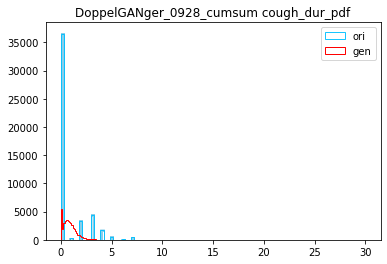

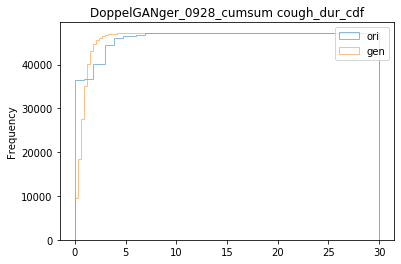

K-S test result: [6.70000000e-01 6.83093516e-17]


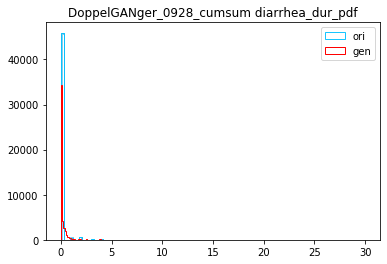

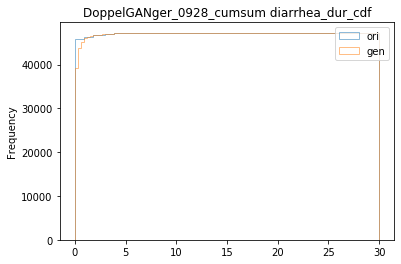

K-S test result: [3.66000000e-01 2.96460269e-05]


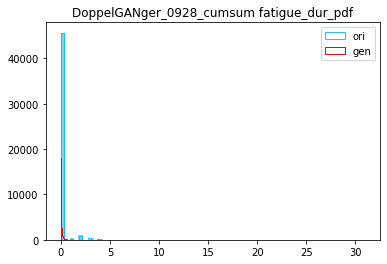

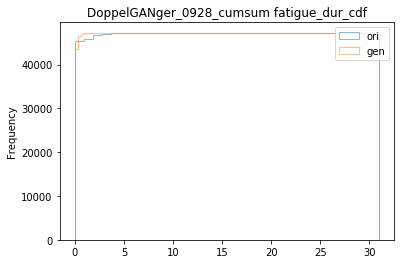

K-S test result: [6.95000000e-01 6.87856805e-21]


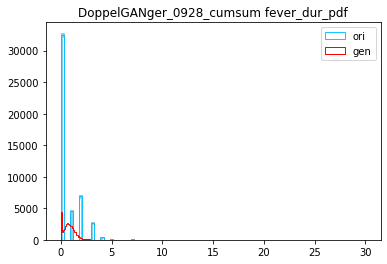

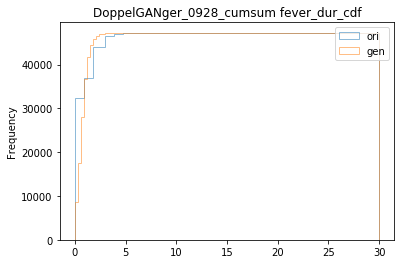

K-S test result: [6.06000000e-01 1.11353113e-14]


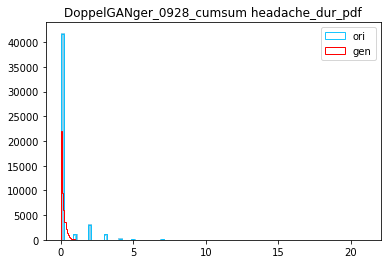

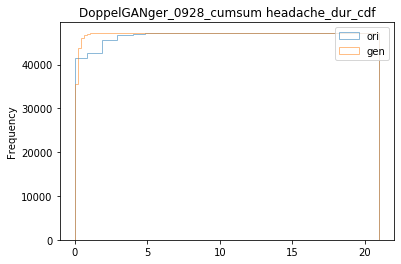

K-S test result: [5.85000000e-01 1.70513586e-10]


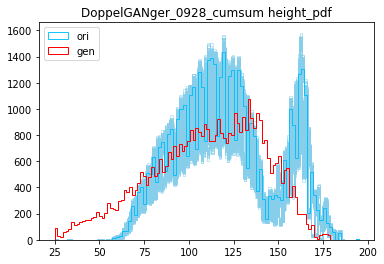

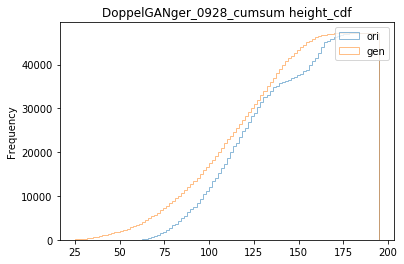

K-S test result: [0.187      0.13167607]


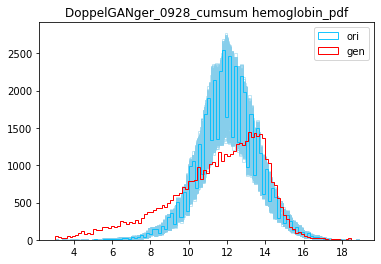

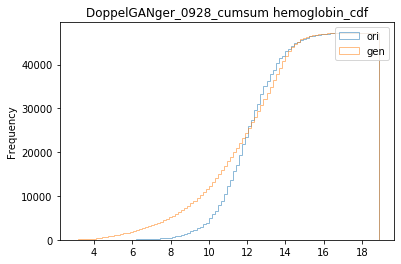

K-S test result: [0.215      0.03907718]


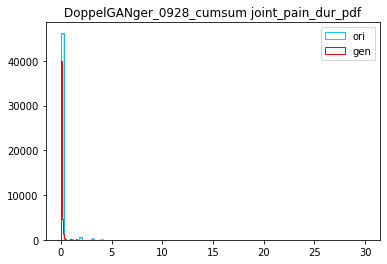

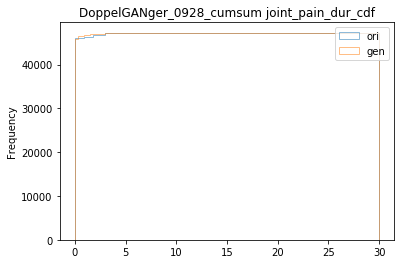

K-S test result: [4.92000000e-01 1.33588074e-10]


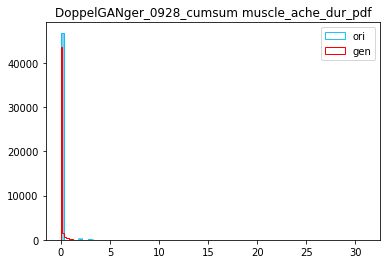

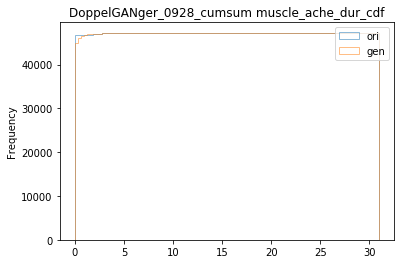

K-S test result: [0.222      0.04403807]


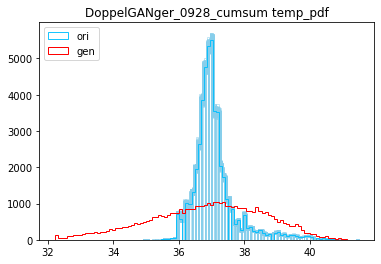

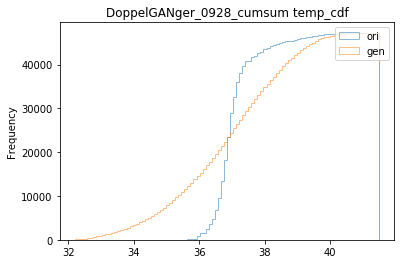

K-S test result: [3.53000000e-01 1.81225909e-05]


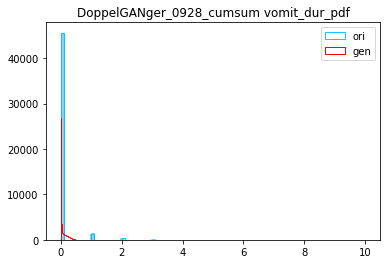

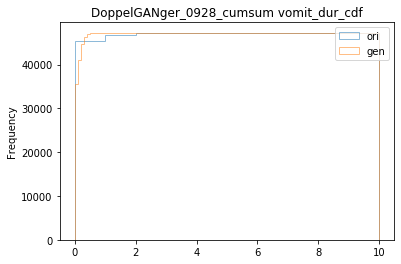

K-S test result: [5.93000000e-01 1.19271274e-13]


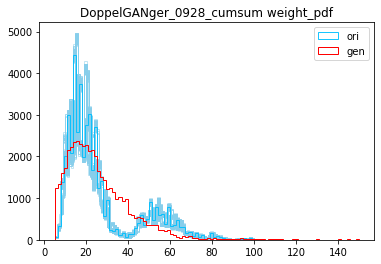

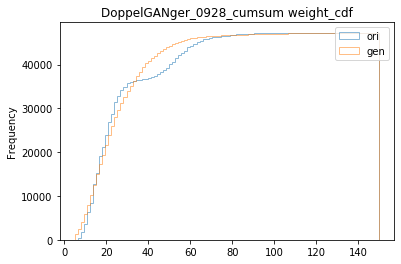

K-S test result: [0.171      0.15181043]


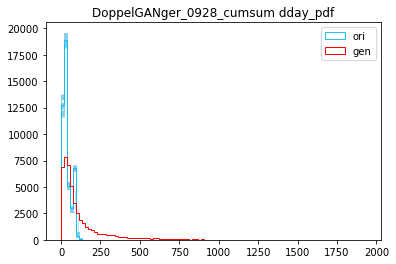

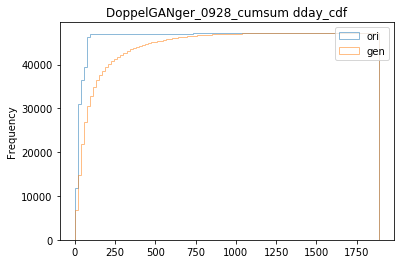

K-S test result: [3.70000000e-01 4.89839429e-05]


In [22]:
#Implement with all synthetic data and the corresponding real data.
for i in range(n):
    key = syn_keys[i]
    p_series = Histogram_KSTest(synthetic_num_dic[key][0],synthetic_num_dic[key][1],syn_name = key)
    if i == 0:
        p_df = pd.DataFrame(p_series,columns = [key])
    else:
        p_df = pd.concat([p_df,pd.DataFrame(p_series,columns = [key])],axis=1,sort = False)

### <u> Results cont. </u>

Table with p values of the Kolmogrov-Smirnov Test for each column, comparing the distribution of the original and the generated dataset. The closer the p values are to 1, the more similar the distribution of a column is between the original and the generated data.

In [23]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
display('Kolmogrov-Smirnov Test p value table',p_df)

'Kolmogrov-Smirnov Test p value table'

,DoppelGANger_0928_cumsum
ab_pain_dur,0.0000000
age,0.1671307
aneroxia_dur,0.0006140
plasmodium_density,0.0000000
cough_dur,0.0000000
diarrhea_dur,0.0000296
fatigue_dur,0.0000000
fever_dur,0.0000000
headache_dur,0.0000000
height,0.1316761


### <u> Conclusions </u>

<a id = "cat_link" Here ></a>

## <font color=#472F91> 1.2 Categorical variables distribution comparison </font>

### <u> Method description </u>

For categorical columns, the empirical distribution of each variable for all categorical columns is calculated for the synthetic dataset and the original dataset.
A dot plot compares the empirical distribution of each variable for the original data set on the x axis and for the synthetic dataset on the y axis, giving a visual perception of the similarity in diversity and distribution. The closer the dot to the y=x line, the higher the fidelity.
<br>To quantifiy this, the MSE (mean squared error) between the empirical distribution for the original and synthetic dataset is calculated for each variable and averaged.
<br><b>The lower the averaged MSE, the higher the fidelity.</b>

### <u> Results </u>

This table displays the probability distributions for each unique variable for each categorical column. The values are plotted on the scatter plot below with generated values on the x axis which are compared to the original values on the y axis. The MSE between the generated and the original probability distributions is supplied below.

In [24]:
#Implement with all synthetic data and the corresponding real data.
d_array = np.zeros(n)
df_cat_dict = {}
for i in range(n):
    key = syn_keys[i]
    distance, df_cat = Scatter_Distance(synthetic_cat_dic[key][0],synthetic_cat_dic[key][1],syn_name = key)
    df_cat_dict[key] = df_cat
    d_array[i] = distance
distance_series= pd.Series(d_array,index = syn_keys)
display('categorical_column-averaged MSE of probability distributions of original and generated data', distance_series)

,,DoppelGANger_0928_cumsum gen probability,DoppelGANger_0928_cumsum ori probability
complicated_malaria_no,True,0.0287980,0.1220322
complicated_malaria_not_assessed,True,0.9708214,0.8762160
complicated_malaria_yes,True,0.0003806,0.0017519
febrile_no,True,0.7293160,0.6865829
febrile_yes,True,0.2706840,0.3134171
ITN_no,True,0.0013955,0.0017312
ITN_not_applicable,True,0.0287134,0.0277617
ITN_yes,True,0.9698911,0.9705070
malaria_no,True,0.9681150,0.8762160
malaria_yes,True,0.0318850,0.1237840


'categorical_column-averaged MSE of probability distributions of original and generated data'

DoppelGANger_0928_cumsum   0.0044471
dtype: float64

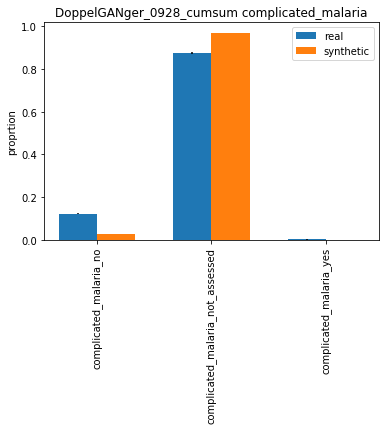

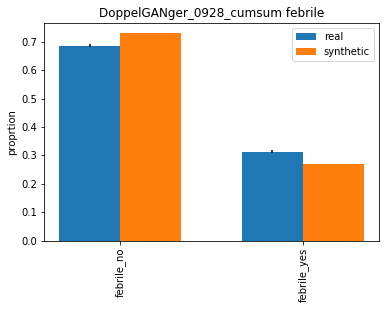

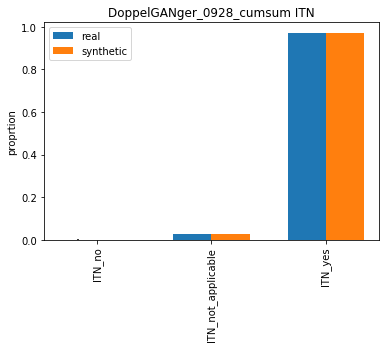

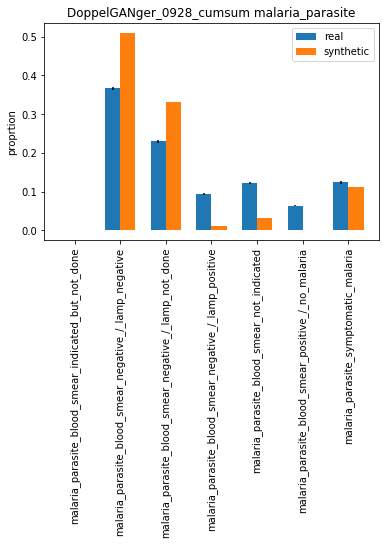

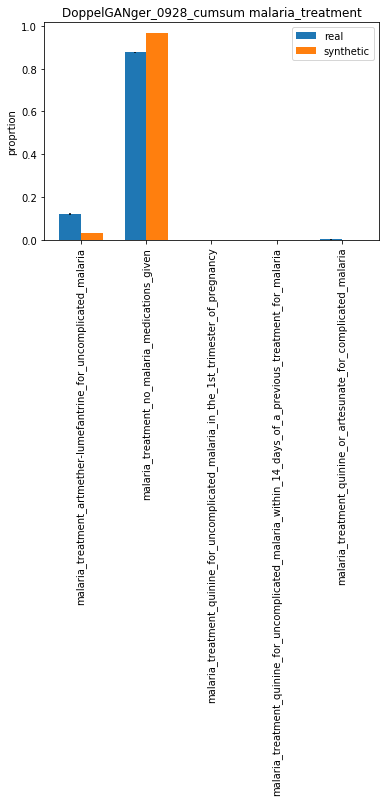

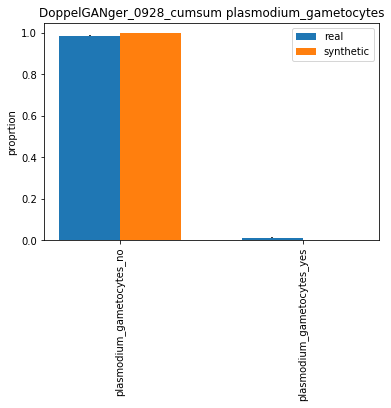

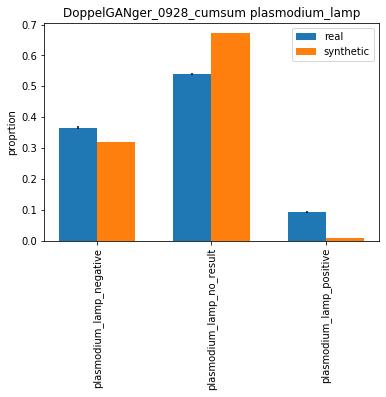

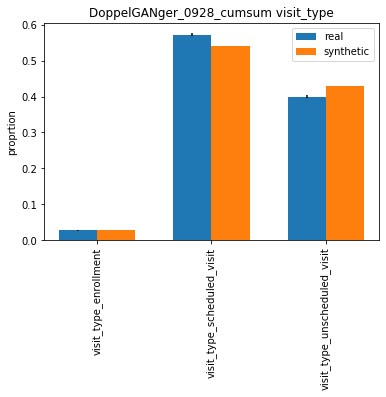

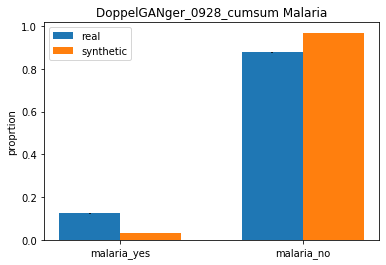

In [25]:
cat_col_distribution(synthetic_cat_dic)

### <u> Conclusions </u>

<a id = "pearsons_link" Here ></a>

## <font color=#472F91> 1.3 Pearson's Correlation Coefficient Comparison </font>

### <u> Method description </u>

To confirm dependencies between variables within columns are maintained, Pearson’s R correlation coefficient is calculated between categorical (all?) columns within the original and synthetic data. The R value measures the strength of association between 2 columns. Ideally, the real and synthetic data should have the same R value for a given pair of columns.
<br>To compare the datasets, we use two measurements. Firstly, the MSE (mean standard error) is calculated between each correlation coefficient.
<br><b>The lower the MSE, the higher the fidelity.</b>
<br>Next, we perform hypothesis testing on the mean MSE value to determine if it is different from zero.
<br><b>The larger the p-value from the hypothesis test, the more likely the mean MSE value is zero.</b>
<br>Secondly, the SRA (Synthetic Ranking Agreement) for each column is calculated. Here, the R correlation coefficients for the remaining columns are ranked for both the synthetic and the original data and compared.
<br><b>The closer SRA is to 1 the higher the fidelity.</b>

### <u> Results </u>

Two tables are displayed with the R correlation coefficient between all columns, for the original and for the generated data. For high level of correlation with an R > 0.5, the cell is coloured yellow. The fourth table displays the MSEs between the R correlation coefficients between the original and the generated data, displaying the result for each column.

In [26]:
n = len(syn_keys)
MSE_array = np.zeros(n)
p_val_array = np.zeros(n)
for i in range(n):
    key = syn_keys[i]
    df_ori = synthetic_data_dic[key][0]
    df_gen = synthetic_data_dic[key][1]
    r_table_ori = r_corr_test(df_ori)
    r_table_gen = r_corr_test(df_gen)

    display(key+' '+'generated r table',r_table_gen.style.applymap(color_threshold_yellow))
    display(key+' '+'real r table',r_table_ori.style.applymap(color_threshold_yellow))
    sra = CorrelationSRA(r_table_ori,r_table_gen,ColumnWise=True)
    if i==0:
        sra_df = pd.DataFrame(sra,columns = [key])
    else:
        sra_df = pd.concat([sra_df,pd.DataFrame(sra,columns = [key])], axis = 1, sort = False)
    #display(key+' '+'SRA',sra)
    MSE_df, MSE_score = MSE(r_table_gen,r_table_ori)
    display(key+' '+'MSE table', MSE_df)
    p_val = hyp_test_mean_mse(MSE_df)
    MSE_array[i] = MSE_score
    p_val_array[i] = p_val
MSE_series = pd.Series(MSE_array,index = syn_keys)
MSE_pval_series = pd.Series(p_val_array,index = syn_keys)

'DoppelGANger_0928_cumsum generated r table'

'DoppelGANger_0928_cumsum real r table'

'DoppelGANger_0928_cumsum MSE table'

,id,ab_pain_dur,age,aneroxia_dur,plasmodium_density,cough_dur,diarrhea_dur,fatigue_dur,fever_dur,headache_dur,...,malaria_treatment_quinine_or_artesunate_for_complicated_malaria,plasmodium_gametocytes_no,plasmodium_gametocytes_yes,plasmodium_lamp_negative,plasmodium_lamp_no_result,plasmodium_lamp_positive,visit_type_enrollment,visit_type_scheduled_visit,visit_type_unscheduled_visit,dday
id,0.0000000,0.0003422,0.0000272,0.0013700,0.0000446,0.0083120,0.0050728,0.0002734,0.0104059,0.0000667,...,0.0001376,0.0026608,0.0026608,0.0139944,0.0039538,0.0076578,0.0013820,0.0037901,0.0055652,0.0068728
ab_pain_dur,0.0003422,0.0000000,0.0561482,0.0005131,0.0036882,0.0377898,0.0111883,0.0031129,0.0014876,0.0082718,...,0.0000016,0.0000000,0.0000000,0.0063585,0.0099618,0.0009599,0.0001844,0.0313874,0.0303939,0.0149359
age,0.0000272,0.0561482,0.0000000,0.0089817,0.0231538,0.0221335,0.0140143,0.0093095,0.0160807,0.0602371,...,0.0001526,0.0000038,0.0000038,0.0279498,0.0230785,0.0010273,0.0004957,0.0312952,0.0290770,0.0299682
aneroxia_dur,0.0013700,0.0005131,0.0089817,0.0000000,0.0004179,0.0039560,0.0086982,0.0251557,0.0000386,0.0033110,...,0.0005064,0.0000373,0.0000373,0.0015851,0.0034022,0.0012162,0.0000176,0.0058469,0.0057843,0.0020470
plasmodium_density,0.0000446,0.0036882,0.0231538,0.0004179,0.0000000,0.0387025,0.0053609,0.1568869,0.0035096,0.0370519,...,0.2831091,0.0000532,0.0000532,0.0031001,0.0068343,0.0026302,0.0000591,0.0097832,0.0094952,0.0021134
cough_dur,0.0083120,0.0377898,0.0221335,0.0039560,0.0387025,0.0000000,0.0013535,0.0035548,0.0581088,0.0072211,...,0.0000350,0.0000041,0.0000041,0.0067860,0.0162826,0.0052904,0.0013003,0.0475261,0.0435161,0.0019077
diarrhea_dur,0.0050728,0.0111883,0.0140143,0.0086982,0.0053609,0.0013535,0.0000000,0.0096414,0.0130741,0.0022692,...,0.0000050,0.0001334,0.0001334,0.0027294,0.0052274,0.0012217,0.0000030,0.0112105,0.0113404,0.0122998
fatigue_dur,0.0002734,0.0031129,0.0093095,0.0251557,0.1568869,0.0035548,0.0096414,0.0000000,0.0636184,0.0000514,...,0.0000323,0.0000279,0.0000279,0.0056399,0.0086105,0.0006623,0.0000008,0.0214897,0.0218292,0.0433699
fever_dur,0.0104059,0.0014876,0.0160807,0.0000386,0.0035096,0.0581088,0.0130741,0.0636184,0.0000000,0.0049871,...,0.0035671,0.0000753,0.0000753,0.0040620,0.0160656,0.0100515,0.0020759,0.0497117,0.0444349,0.0094287
headache_dur,0.0000667,0.0082718,0.0602371,0.0033110,0.0370519,0.0072211,0.0022692,0.0000514,0.0049871,0.0000000,...,0.0001349,0.0000056,0.0000056,0.0208655,0.0340118,0.0037901,0.0006766,0.0989750,0.0954293,0.0000071


### <u> Results cont. </u>

The averaged MSE for all columns and the p-value between the orignal and generated data is presented below.
<br>The table below the MSE includes the SRA (Synthetic Ranking Accuracy) for each column where it's R correlation coefficients with the remaining columns are ranked for both the synthetic and the original data and compared.

In [27]:
display('averaged MSE values of R for each version of synthetic data', MSE_series)
display('p-values for MSE values of r for each version of synthetic data', MSE_pval_series)

'averaged MSE values of R for each version of synthetic data'

DoppelGANger_0928_cumsum   0.0250345
dtype: float64

'p-values for MSE values of r for each version of synthetic data'

DoppelGANger_0928_cumsum   0.0000000
dtype: float64

In [28]:
display('SRA: Ranking each column and comparing between original and generated data', sra_df)

'SRA: Ranking each column and comparing between original and generated data'

,DoppelGANger_0928_cumsum
id,0.5975177
ab_pain_dur,0.6285461
age,0.6631206
aneroxia_dur,0.6773050
plasmodium_density,0.5531915
cough_dur,0.6657801
diarrhea_dur,0.6693262
fatigue_dur,0.6134752
fever_dur,0.7109929
headache_dur,0.5975177


### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 2. Fidelity Evaluation </font>

<a id = "tSNE_PCA_link" Here ></a>

## <font color=#472F91> 2.1 tSNE and PCA plots comparison </font>

### <u> Method description </u>

tSNE and PCA plots reduce a multi-dimensional dataset (i.e with multiple columns) into a 2-dimensional visualisation. 
<br>A machine-learning algorithm groups similar variables and although we cannot interpret the coordinates attributed, we can compare if the groupings made are similar in the original and synthetic data by overlaying the plots.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

tSNE and PCA plot overlays for original and generated data

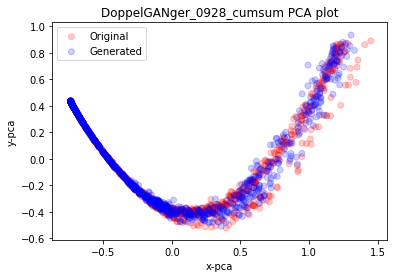

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.013s...
[t-SNE] Computed neighbors for 2000 samples in 1.052s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.108202
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.898518
[t-SNE] KL divergence after 300 iterations: 0.345862


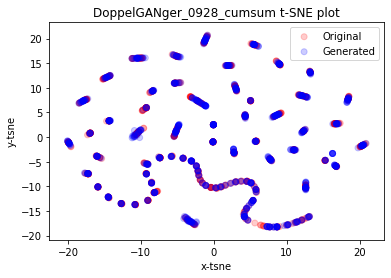

In [29]:
for i in range(n):
    key = syn_keys[i]
    dp_pca_results, dp_pca_hat_results = visualization(synthetic_array_scaled_dic[key][0], synthetic_array_scaled_dic[key][1], 'pca',syn_name = key)
    dp_tsne_results, dp_tsne_hat_results = visualization(synthetic_array_scaled_dic[key][0], synthetic_array_scaled_dic[key][1], 'tsne',syn_name = key)

### <u> Conclusions </u>

<a id = "discrim_link" Here ></a>

## <font color=#472F91> 2.2 Discriminative model performance </font>

### <u> Model Description </u>
For a quantitative measure of similarity, a post-hoc time-series classification model is trained (by optimizing a multi-layer GRU) to distinguish between sequences from the original and generated datasets.
First, each original sequence is labeled '1', and each generated sequence is labeled '0'.
<br>Then, an off-the-shelf (RNN) classifier is trained to distinguish between the two classes as a standard supervised task.
<br>An accuracy score on the held-out test set gives a quantitative assessment of fidelity.
<br><b>An accuracy score similar to the expected accuracy score for an untrained discriminative model indicates the discriminator cannot tell the difference between both datasets.</b>

### <u> Results </u>

A table with the report is displayed together with the expected accuracy and the obtained accuracy. The more similar these two values are, the better the fidelity of the generated data towards the original data.

In [30]:
for i in range(n):
    key = syn_keys[i]

    # train discriminative model
    train_data, val_data, test_data, train_labels, val_labels, test_labels = train_val_test_split(ori_data=synthetic_array_num_scaled_dic[key][0], gen_data=synthetic_array_num_scaled_dic[key][0])

    input_dim = np.asarray(synthetic_array_num_scaled_dic[key][0]).shape[2]
    d_model = discriminative_model(input_size=[None, input_dim], hidden_dim=64)

    # CHANGE TO MORE EPOCHS
    history_d_model = d_model.fit(train_data, train_labels, batch_size=128, epochs=100, validation_data=(val_data, val_labels), verbose=0)

    d_model.evaluate(test_data, test_labels)

    # get prediction from test data
    test_pred = np.round(d_model.predict(test_data))

    report = classification_report(test_labels, test_pred, digits=5, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)

    exp_acc = np.sum(test_labels)/np.shape(test_labels)[0]
    print('Expected accuracy for an untrained discriminative model = ', str(exp_acc))
    print('Final accuracy of trained discriminative model = ', str(accuracy_score(test_labels, test_pred)))

13/13 [==============================] - 0s 33ms/step - loss: 0.6936
              precision    recall  f1-score     support
0.0           0.4814815 1.0000000 0.6500000 195.0000000
1.0           0.0000000 0.0000000 0.0000000 210.0000000
accuracy      0.4814815 0.4814815 0.4814815   0.4814815
macro avg     0.2407407 0.5000000 0.3250000 405.0000000
weighted avg  0.2318244 0.4814815 0.3129630 405.0000000
Expected accuracy for an untrained discriminative model =  0.5185185185185185
Final accuracy of trained discriminative model =  0.48148148148148145


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### <u> Conclusions </u>

<a id = "auto_link" Here ></a>

## <font color=#472F91> 2.3 Autocorrelation comparison </font>

### <u> Model description </u>

To confirm the variance in numerical values/counts over time are maintained, autocorrelation graphs are plotted for both datasets and overlayed.
<br><b>The higher the overlay, the higher the fidelity.</b>

### <u> Results </u>

The following plots show overlays of the autocorrelation plots for original and generated data for number of visits per week and number of positive malaria diagnosis per week.

In [31]:
acf_dict = {}
for i in range(n):
    key = syn_keys[i]
    ori_auto_5above, table_freq_visit_week_ori = auto_prep(synthetic_auto_dic[key][0])
    gen_auto, table_freq_visit_week_gen = auto_prep(synthetic_auto_dic[key][1])
    acf_df_week_visits, autocorrelation_plot_week_visits = autocorrelation(ori_auto_5above, gen_auto, table_freq_visit_week_ori,table_freq_visit_week_gen, key, " plot for number of visits per week")
    acf_dict[key] = acf_df_week_visits
    display(autocorrelation_plot_week_visits)


/Users/rebecafiadeiro/Documents/HDI/synthetic-data-service/doppelganger/gan/evaluation/fidelity_eval.py:182: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/rebecafiadeiro/Documents/HDI/synthetic-data-service/doppelganger/gan/evaluation/fidelity_eval.py:185: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
acf_malaria_dict = {}
for i in range(n):
    key = syn_keys[i]
    malaria_ori=subset(synthetic_auto_dic[key][0],'Malaria diagnosis [EUPATH_0000090]')
    malaria_gen=subset(synthetic_auto_dic[key][1],'Malaria diagnosis [EUPATH_0000090]')
    malaria_ori, table_freq_malaria_ori = auto_prep(malaria_ori)
    malaria_gen, table_freq_malaria_gen = auto_prep(malaria_gen)
    acf_df_malaria, autocorrelation_plot_malaria=autocorrelation(malaria_ori, malaria_gen, table_freq_malaria_ori, table_freq_malaria_gen, key, " plot for malaria diagnosis per week")
    acf_malaria_dict[key] = acf_df_malaria
    display(autocorrelation_plot_malaria)

### <u> Conclusions </u>

<hr>

# <font color=#0275D8> 3. Usefulness evaluation </font>

<a id = "pred_link" Here ></a>

## <font color=#472F91> 3.1 Predictive model performance comparison </font>

### <u> Method description </u>

A series of commonly used regression based predictive models (Linear Regression, Linear Support Vector Regression, Random Forests Regression, Logistic Regression, Decision tree Regression and K-Nearest Neighbors Regression) are applied to the test samples and trained on the train samples for both the original and the synthetic data (Test-on-real, Train-on-real & Test-on-synthetic, Train-on-synthetic). The model attempts to predict a variable within a column based on the remaining columns.  
    The MSE (mean squared error) is calculated between the predicted value resulting from the predictive model and the test sample and averaged (MSE_1), resulting in MSE_1's for each column, for each predictive model, for the original and synthetic datasets (visualised in the first scatter plot below).  
    <br>To compare the datasets, the MSE between the MSE_1's of the original and the synthetic dataset is calculated (MSE_2), resulting in MSE_2's for each predictive model.
    <br>The average of MSE_1's for all columns is calculated between the datasets (MSE_3), resulting in MSE_3 for each predictive model, for the original and the synthetic dataset (visualised in the second scatter plot below).
    <br> To compare datasets, the MSE between the MSE_3's for the original and the synthetic data is calculated (MSE_4).
    <br><b>A low MSE_2/MSE_4 indicates the synthetic and original dataset behaved similarly in the predictive models.</b>
    <br>Because users to do not have access to the original data, synthetic data should behave similarly to the original data when trained using any algorithms.  
    To assess this, we use SRA (Synthetic Ranking Agreement) which focuses on measuring how similar algorithms perform when trained with original and synthetic data. The MSE_1's (MSE for each column) for each predictive model are ranked and the ranking  of the original and synthetic data are compared, resulting in SRA_1 for each column.
    <br>Similarly, the MSE_3's (column-averaged MSE) for each predictive model can be ranked, giving an SRA_2 measure.
    <br><b>SRA values close to 1 indicate the synthetic and original dataset behave similarly when trained on different predictive models.</b>

### <u> Results </u>

The following table shows the MSE_1's (i.e the prediction scores) obtained for each column for each predictive model in the original and in the generated data. 
<br>The original log(MSE_1) and the generated log(MSE_1) are used as coordinates for the scatter plot below. We use the log(MSE) (instead of the MSE) to simplify visualisation.
<br>The MSE's between the original and the generated data (MSE_2) can be seen below the scatter plots for each model. The averaged MSE between all models is also displayed.

In [33]:
# MSE_1
colmse_t = Comparison_Table(synthetic_num_scaled_dic, aver=False, models=['LR', 'KNR1', 'DTR'])
pd.set_option('display.max_columns', 200)
display(colmse_t)

DoppelGANger_0928_cumsum                                            \
                          ori                                             
                  ab_pain_dur       age aneroxia_dur plasmodium_density   
LR                  0.0009542 0.0110994    0.0002744          0.0005640   
KNR1                0.0010511 0.0069154    0.0003128          0.0006071   
DTR                 0.0017987 0.0078175    0.0005044          0.0009426   

                                                                          \
                                                                           
     cough_dur diarrhea_dur fatigue_dur fever_dur headache_dur    height   
LR   0.0022413    0.0002317   0.0002726 0.0007992    0.0012137 0.0051248   
KNR1 0.0025717    0.0002616   0.0003322 0.0008840    0.0012455 0.0012249   
DTR  0.0043512    0.0005651   0.0005163 0.0014138    0.0021238 0.0015094   

                                                                              \
                                                                               
     hemoglobin joint_pain_dur muscle_ache_dur      temp vomit_dur    weight   
LR    0.0075799      0.0004207       0.0000921 0.0042066 0.0007873 0.0025469   
KNR1  0.0081965      0.0004781       0.0000942 0.0043314 0.0008973 0.0016477   
DTR   0.0132759      0.0006370       0.0002529 0.0071335 0.0015482 0.0018834   

                                                                      \
                       gen                                             
          dday ab_pain_dur       age aneroxia_dur plasmodium_density   
LR   0.0018680   0.0000635 0.0084216    0.0000331          0.0000587   
KNR1 0.0021379   0.0000284 0.0014485    0.0000147          0.0000279   
DTR  0.0039091   0.0000304 0.0011236    0.0000172          0.0000380   

                                                                          \
                                                                           
     cough_dur diarrhea_dur fatigue_dur fever_dur headache_dur    height   
LR   0.0003498    0.0003551   0.0000159 0.0002119    0.0000648 0.0058430   
KNR1 0.0002191    0.0001180   0.0000061 0.0001393    0.0000376 0.0025192   
DTR  0.0002616    0.0000448   0.0000061 0.0001840    0.0000626 0.0033846   

                                                                              \
                                                                               
     hemoglobin joint_pain_dur muscle_ache_dur      temp vomit_dur    weight   
LR    0.0031739      0.0001297       0.0002145 0.0076542 0.0000976 0.0058387   
KNR1  0.0016018      0.0000317       0.0000232 0.0025330 0.0000505 0.0015168   
DTR   0.0026708      0.0000287       0.0000874 0.0036890 0.0000442 0.0007594   

                
                
          dday  
LR   0.0041950  
KNR1 0.0014497  
DTR  0.0018639

In [34]:
plot_colmse(colmse_t)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [35]:
# MSE_2
avg_modelmse_t = get_avg_mse_per_model(colmse_t)
print("Column-averaged MSE between real and generated data for each model")
display(avg_modelmse_t)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: PerformanceWarning:

indexing past lexsort depth may impact performance.



Column-averaged MSE between real and generated data for each model


,DoppelGANger_0928_cumsum
LR,0.0000037
KNR1,0.0000052
DTR,0.0000122


In [36]:
print("mean across models of the column-averaged-MSE ")
get_mean_avg_modelmse(avg_modelmse_t)

mean across models of the column-averaged-MSE 


,DoppelGANger_0928_cumsum
mean model-averaged mse,0.0000070


### <u> Results cont. </u>
The following table shows the column-averaged MSE's from MSE_1 values (MSE_3) for each predictive model for the original and synthetic data. 
<br>The original and generated MSE values are used as coordinates for the scatter plot below. 
<br> The MSE between the original and generated values (MSE_4) is shown below.

In [37]:
# MSE_3
com_t = Comparison_Table(synthetic_num_scaled_dic, aver=True, models=['LR', 'KNR1'])
print('column-averaged MSE for each model for the original and synthetic data')
display(com_t)

column-averaged MSE for each model for the original and synthetic data


DoppelGANger_0928_cumsum          
                      ori MSE   gen MSE
LR                  0.0023177 0.0022033
KNR1                0.0019172 0.0006986

In [38]:
Scatter_TSTS_TRTR(com_t)

In [39]:
# MSE_4
print("model-averaged MSE of (column-averaged MSE between original and generated data)")
get_origen_mse(com_t)

model-averaged MSE of (column-averaged MSE between original and generated data)


,DoppelGANger_0928_cumsum
avg ori gen MSE,0.0000007


### <u> Results cont. </u>
This presents the SRA for each column (SRA_1), where the MSE_1's for each predictive model were ranked and compared between original and synthetic data. This is repeated for all the columns.
<br> The second table (SRA_2) displays the SRA value that was calculated using the column-averaged  MSE's (MSE_3) ranking the predictive models which is compared between the original and synthetic data. 

In [40]:
# SRA_1
sra_col_t = get_SRA_per_col(colmse_t, num_cols)
print("SRA: Ranking the MSE of each model compared between real and original data")
display(sra_col_t)

SRA: Ranking the MSE of each model compared between real and original data


DoppelGANger_0928_cumsum                                            \
                 ab_pain_dur       age aneroxia_dur plasmodium_density   
SRA                0.3333333 0.6666667    0.3333333          0.3333333   

                                                                         \
    cough_dur diarrhea_dur fatigue_dur fever_dur headache_dur    height   
SRA 0.3333333    0.0000000   0.0000000 0.3333333    0.3333333 1.0000000   

                                                                             \
    hemoglobin joint_pain_dur muscle_ache_dur      temp vomit_dur    weight   
SRA  0.3333333      0.0000000       0.3333333 0.3333333 0.0000000 0.6666667   

               
         dday  
SRA 0.3333333

In [41]:
# SRA_2
sra_E = SRA_TSTS_TRTR(com_t)
display(sra_E)

'SRA: Ranking MSE for each model between real and generated data'

DoppelGANger_0928_cumsum   1.0000000
dtype: float64

### <u> Conclusions </u>

<a id = "tpred_link" Here ></a>

## <font color=#472F91> 3.2 Next-step predictive model performance comparison </font>

### <u> Method description </u>
This method has a similar principal to the previous method with the difference that the predictive model attempts to predict all variables for next time-step entry
    based on the values for previous time-stamps.
    <br>Here the predictive model provided by Tensorflow Keras API returns a test metric and a test loss for each column.
    <br>To compare between datasets, two parameters are determined.
    <br>Firstly, the MSE of the test loss/test metric is calculated between the real and the synthetic data for each column.
    <br>Secondly, the SRA is calculated, ranking the test metric/test loss of each column, and then comparing the rank for the synthetic and the original data.
    <br><b>A low MSE and an SRA close to 1 indicates the predictive model behaves similarly in attempting to predict the next time-step in both datasets.</b>

### <u> Results </u>
The following table gives a report on the test metric and test loss for each column when trained with with the number of epochs and windows described below.
<br> The scatter plots display the test metric or the test loss for the original data (x axis) and generated data (y axis) for each predicted column.
<br> Finally, the MSE of the test metric and the test loss for all columns is calculated between the original and the generated data. In parallel, the SRA is also calculated, where the test metric or test loss for each column is ranked and compared between the original and the generated data.

In [42]:
# CHANGE TO ALL COLUMNS and HAVE MORE EPOCHS
TxTx_tpred = TxTx_tpred_multiple(synthetic_array_num_scaled_dic, y_cols=[0,1], y_cols_name=num_cols[:2], windows=65, epochs=1, show_training=False)
TxTx_tpred


Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 7s 10ms/step - loss: 0.0141 - last_time_step_mae: 0.0024

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
696/696 [==============================] - 8s 12ms/step - loss: 0.0200 - last_time_step_mae: 0.0048

Predictive model running for column  ab_pain_dur  with window length  65
Getting results for column  ab_pain_dur  with window length  65
696/696 [==============================] - 8s 11ms/step - loss: 0.0014 - last_time_step_mae: 5.6377e-04

Predictive model running for column  age  with window length  65
Getting results for column  age  with window length  65
696/696 [==============================] - 9s 13ms/step - loss: 0.0281 - last_time_step_mae: 0.0025


DoppelGANger_0928_cumsum                                                 \
                     y_col test_loss_trtr test_metric_trtr test_loss_tsts   
0              ab_pain_dur      0.0141429        0.0023803      0.0014079   
1                      age      0.0200429        0.0047898      0.0281269   

                    
  test_metric_tsts  
0        0.0005638  
1        0.0024608

In [43]:
plot_TxTx_tpred(TxTx_tpred)

In [44]:
TxTx_tpred_mse = get_TxTx_mse(TxTx_tpred)
print("numerical_column-averaged MSE between TRTR and TSTS ")
TxTx_tpred_mse

numerical_column-averaged MSE between TRTR and TSTS 


DoppelGANger_0928_cumsum            
                             test_loss metric_loss
trtr tsts MSE                0.0001138   0.0000044

In [45]:
TxTx_tpred_sra = get_TxTx_SRA(TxTx_tpred)
print("SRA: Ranking numerical columns between real and synthetic data")
TxTx_tpred_sra

SRA: Ranking numerical columns between real and synthetic data


DoppelGANger_0928_cumsum            
                   test_loss metric_loss
SRA                1.0000000   1.0000000

<hr>

# <font color=#0275D8> CSV exports </font>

In [29]:
# 1. define version of data to be saved
# since some functions concatenate all versions together in one df while others produce separate ones
version = 'DoppelGANger_0903'
# 2. replace csv_results folder date

##1.1 Histograms
ori_num.columns=[str(col) + '_ori' for col in ori_num.columns]
gen_num.columns=[str(col) + '_gen' for col in gen_num.columns]
hist_df=pd.concat([ori_num, gen_num], axis=1, sort=False)
#hist_df.to_csv('csv_results_0903/distribution_num_coordinates.csv')

##1.2 Categorical plots
df_cat_1 = df_cat_dict[version]
#df_cat_1.to_csv('csv_results_0903/distribution_cat_coordinates.csv')

##2.1 tSNE and PCA plots
dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
#dp_pca_df.to_csv('csv_results_0903/pca_coordinates.csv', index=False)
dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
#dp_tsne_df.to_csv('csv_results_0903/tsne_coordinates.csv', index=False)

##2.3 Autocorrelation
acf_df_week_visits_1 = acf_dict[version]
#acf_df_week_visits_1.to_csv('csv_results_0903/autocorrelation_visitweeks.csv')
acf_df_malaria_1 = acf_malaria_dict[version]
#acf_df_malaria_1.to_csv('csv_results_0903/autocorrelation_malaria.csv')

##3.1 Predictive model
log_colmse_t = np.log(colmse_t)
#log_colmse_t.to_csv('csv_results_0903/MSE_1_coordinates_figure1.csv')

#com_t.to_csv('csv_results_0903/MSE_3_coordinates_figure2.csv') #manually remove first row before seeding

##3.2 Time Predictive model
#TxTx_tpred.to_csv('csv_results_0903/t_Predictive_coordinates.csv') #manually remove top row and first column b4 seeding

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning:

divide by zero encountered in log

